In [56]:
# 1. Use a `seaborn pairplot' (sns.pairplot()) to visualise your data. 

# 1.1. Load the data.

import pandas as pd

# Column headers.
# AAGE,AANCSTR1,AANCSTR2,AAUGMENT,ABIRTHPL,ACITIZEN,ACLASS,ADEPART,ADISABL1,ADISABL2,AENGLISH,AFERTIL,AGE,AHISPAN,AHOUR89,AHOURS,AIMMIGR,AINCOME1,AINCOME2,AINCOME3,AINCOME4,AINCOME5,AINCOME6,AINCOME7,AINCOME8,AINDUSTR,ALABOR,ALANG1,ALANG2,ALSTWRK,AMARITAL,AMEANS,AMIGSTAT,AMOBLLIM,AMOBLTY,ANCSTRY1,ANCSTRY2,AOCCUP,APERCARE,APOWST,ARACE,ARELAT1,ARIDERS,ASCHOOL,ASERVPER,ASEX,ATRAVTME,AVAIL,AVETS1,AWKS89,AWORK89,AYEARSCH,AYRSSERV,CITIZEN,CLASS,DEPART,DISABL1,DISABL2,ENGLISH,FEB55,FERTIL,HISPANIC,HOUR89,HOURS,IMMIGR,INCOME1,INCOME2,INCOME3,INCOME4,INCOME5,INCOME6,INCOME7,INCOME8,INDUSTRY,KOREAN,LANG1,LANG2,LOOKING,MARITAL,MAY75880,MEANS,MIGPUMA,MIGSTATE,MILITARY,MOBILITY,MOBILLIM,OCCUP,OTHRSERV,PERSCARE,POB,POVERTY,POWPUMA,POWSTATE,PWGT1,RACE,RAGECHLD,REARNING,RECTYPE,RELAT1,RELAT2,REMPLPAR,RIDERS,RLABOR,ROWNCHLD,RPINCOME,RPOB,RRELCHLD,RSPOUSE,RVETSERV,SCHOOL,SEPT80,SERIALNO,SEX,SUBFAM1,SUBFAM2,TMPABSNT,TRAVTIME,VIETNAM,WEEK89,WORK89,WORKLWK,WWII,YEARSCH,YEARWRK,YRSSERV
df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")

df_age_income = pd.DataFrame()
df_age_income["AGE"] = df[["AGE"]].copy()
df_age_income["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_age_income.head(5)

,AGE,INCOME
0,39,12790
1,13,0
2,71,3600
3,16,2724
4,63,3432


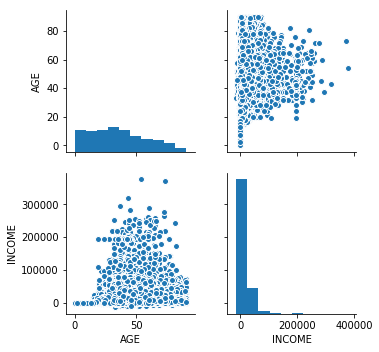

In [57]:
# 1.2. Visualise the data.

import seaborn as sns
sns.pairplot(df_age_income)

In [58]:
# 2. Loop over different cluster sizes starting from 2 until 10,
# using all the features present and pick the one with the
# lowest silhouette score.

import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

clusters_min = 2
clusters_max = 10

sample_size = 1000

lowest_silhouette_score_kmeans = 1
lowest_silhouette_score_cluster_kmeans = 0

lowest_silhouette_score_agglomerative_clustering = 1
lowest_silhouette_score_cluster_agglomerative_clustering = 0

silhouette_scores_kmeans = {}
silhouette_scores_agglomerative_clustering = {}

# Take a sample of the data.
X = df_age_income.values[np.random.choice(df_age_income.values.shape[0], sample_size)]

# Center the data: Zero mean and unit standard error.
X_db = StandardScaler().fit_transform(X)

for i in range(clusters_min, clusters_max + 1):
    
    results_kmeans = []
    results_agglomerative_clustering = []
    
    for j in range(10):
        # Returns integer array corresponding to clusters.
        labels_kmeans = KMeans(i).fit_predict(X_db)        
        results_kmeans.append(metrics.silhouette_score(X_db, labels_kmeans))
        
        labels_agglomerative_clustering = AgglomerativeClustering(i).fit_predict(X_db)        
        results_agglomerative_clustering.append(metrics.silhouette_score(X_db, labels_agglomerative_clustering))
        
    silhouette_scores_kmeans[i] = results_kmeans
    silhouette_score_mean_kmeans = np.mean(silhouette_scores_kmeans[i])
    
    silhouette_scores_agglomerative_clustering[i] = results_agglomerative_clustering
    silhouette_score_mean_agglomerative_clustering = np.mean(silhouette_scores_agglomerative_clustering[i])
    
    print("Cluster no. " + str(i) + ": Silhouette Coefficient KMeans %0.3f"
          % np.mean(silhouette_scores_kmeans[i])
          + " AgglomerativeClustering: %0.3f"
          % np.mean(silhouette_scores_agglomerative_clustering[i]))
    
    if (silhouette_score_mean_kmeans < lowest_silhouette_score):
        lowest_silhouette_score = silhouette_score_mean
        lowest_silhouette_score_cluster = i
        
    if (silhouette_score_mean_agglomerative_clustering < lowest_silhouette_score_agglomerative_clustering):
        lowest_silhouette_score_agglomerative_clustering = silhouette_score_mean_agglomerative_clustering
        lowest_silhouette_score_cluster_agglomerative_clustering = i
        
print("\nLowest Silhouette Coefficient KMeans: " + str(lowest_silhouette_score))
print("Lowest Silhouette Score Cluster KMeans: " + str(lowest_silhouette_score_cluster))

print("\nLowest Silhouette Coefficient AgglomerativeClustering: " + str(lowest_silhouette_score_agglomerative_clustering))
print("Lowest Silhouette Score Cluster AgglomerativeClustering: " + str(lowest_silhouette_score_cluster_agglomerative_clustering))


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Cluster no. 2: Silhouette Coefficient KMeans 0.457 AgglomerativeClustering: 0.400
Cluster no. 3: Silhouette Coefficient KMeans 0.514 AgglomerativeClustering: 0.433
Cluster no. 4: Silhouette Coefficient KMeans 0.506 AgglomerativeClustering: 0.451
Cluster no. 5: Silhouette Coefficient KMeans 0.496 AgglomerativeClustering: 0.452
Cluster no. 6: Silhouette Coefficient KMeans 0.480 AgglomerativeClustering: 0.453
Cluster no. 7: Silhouette Coefficient KMeans 0.469 AgglomerativeClustering: 0.462
Cluster no. 8: Silhouette Coefficient KMeans 0.435 AgglomerativeClustering: 0.437
Cluster no. 9: Silhouette Coefficient KMeans 0.448 AgglomerativeClustering: 0.441
Cluster no. 10: Silhouette Coefficient KMeans 0.432 AgglomerativeClustering: 0.413

Lowest Silhouette Coefficient KMeans: 0.5064925530027882
Lowest Silhouette Score Cluster KMeans: 10

Lowest Silhouette Coefficient AgglomerativeClustering: 0.400302484210654
Lowest Silhouette Score Cluster AgglomerativeClustering: 2


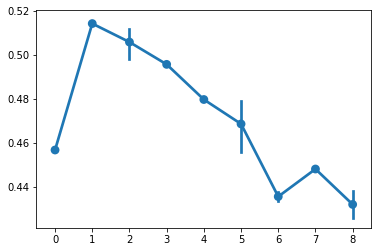

In [59]:
# 3. Save 10 runs for each cluster size and use a seabarn pointplot.

sns.pointplot(data=[silhouette_scores_kmeans[i] for i in range(clusters_min, clusters_max + 1)])

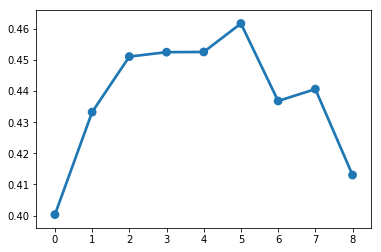

In [60]:
# 4. Change your clusterer to "AgglomerativeClustering" and
# re-do the above experiment - what do you observe?

sns.pointplot(data=[silhouette_scores_agglomerative_clustering[i] for i in range(clusters_min, clusters_max + 1)])